# Assessing Studies Based on Multiple Regression

#### 9.4 Example: Test Scores and Class Size

In [1]:
# importing necessary libraries
import pandas as pd
from statsmodels.formula.api import ols
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

# importing the California School data and naming it differently since we will be having two data
dataCal = pd.read_csv('caschool.csv')
dataCal

,Observation Number,dist_cod,county,district,gr_span,enrl_tot,teachers,calw_pct,meal_pct,computer,testscr,comp_stu,expn_stu,str,avginc,el_pct,read_scr,math_scr
0,1,75119,Alameda,Sunol Glen Unified,KK-08,195,10.900000,0.510200,2.040800,67,690.799988,0.343590,6384.911133,17.889910,22.690001,0.000000,691.599976,690.000000
1,2,61499,Butte,Manzanita Elementary,KK-08,240,11.150000,15.416700,47.916698,101,661.200012,0.420833,5099.380859,21.524664,9.824000,4.583333,660.500000,661.900024
2,3,61549,Butte,Thermalito Union Elementary,KK-08,1550,82.900002,55.032299,76.322601,169,643.599976,0.109032,5501.954590,18.697226,8.978000,30.000002,636.299988,650.900024
3,4,61457,Butte,Golden Feather Union Elementary,KK-08,243,14.000000,36.475399,77.049202,85,647.700012,0.349794,7101.831055,17.357143,8.978000,0.000000,651.900024,643.500000
4,5,61523,Butte,Palermo Union Elementary,KK-08,1335,71.500000,33.108601,78.427002,171,640.849976,0.128090,5235.987793,18.671330,9.080333,13.857677,641.799988,639.900024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
415,416,68957,San Mateo,Las Lomitas Elementary,KK-08,984,59.730000,0.101600,3.556900,195,704.300049,0.198171,7290.338867,16.474134,28.716999,5.995935,700.900024,707.700012
416,417,69518,Santa Clara,Los Altos Elementary,KK-08,3724,208.479996,1.074100,1.503800,721,706.750000,0.193609,5741.462891,17.862625,41.734108,4.726101,704.000000,709.500000
417,418,72611,Ventura,Somis Union Elementary,KK-08,441,20.150000,3.563500,37.193802,45,645.000000,0.102041,4402.831543,21.885857,23.733000,24.263039,648.299988,641.700012
418,419,72744,Yuba,Plumas Elementary,KK-08,101,5.000000,11.881200,59.405899,14,672.200012,0.138614,4776.336426,20.200001,9.952000,2.970297,667.900024,676.500000


In [2]:
# importing the Massachusetts school data
# please download the data first into your working directory otherwise it won't work
dataMa = pd.read_csv('mcas.csv')
dataMa

,code,municipa,district,regday,specneed,bilingua,occupday,tot_day,s_p_c,spec_ed,lnch_pct,tchratio,percap,totsc4,totsc8,avgsalry,pctel
0,1,ABINGTON,Abington,4201,7375.689941,0,0,4646,16.600000,14.600000,11.800000,19.000000,16.379,714,691.0,34.360001,0.000000
1,2,ACTON,Acton,4129,8573.990234,0,0,4930,5.700000,17.400000,2.500000,22.600000,25.792,731,NaN,38.063000,1.246106
2,3,ACUSHNET,Acushnet,3627,8081.720215,0,0,4281,7.500000,12.100000,14.100000,19.299999,14.040,704,693.0,32.491001,0.000000
3,5,AGAWAM,Agawam,4015,8181.370117,0,0,4826,8.600000,21.100000,12.100000,17.900000,16.111,704,691.0,33.105999,0.322581
4,7,AMESBURY,Amesbury,4273,7037.220215,0,0,4824,6.100000,16.799999,17.400000,17.500000,15.423,701,699.0,34.436501,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215,344,WINCHESTER,Winchester,5631,9549.150391,0,0,6264,6.800000,11.100000,3.300000,16.900000,30.615,737,730.0,NaN,0.787402
216,346,WINTHROP,Winthrop,3986,8068.390137,0,0,4805,12.500000,20.900000,16.600000,16.600000,17.850,704,696.0,NaN,2.512563
217,347,WOBURN,Woburn,4945,8069.970215,0,0,5712,17.200001,16.200001,16.900000,18.400000,18.155,721,709.0,NaN,0.000000
218,348,WORCESTER,Worcester,4545,9719.620117,6541,2951,5727,8.300000,17.799999,45.700001,16.600000,13.393,693,664.0,35.615501,3.080082


#### Table 9.1
Summary Statistics for Califronia and Massachusetts Test Score Data sets

In [3]:
# Showing some statistics of our California School data
dataCal[['testscr', 'str', 'el_pct', 'meal_pct', 'avginc']].describe() #avginc's values are in thousands of dollars 

,testscr,str,el_pct,meal_pct,avginc
count,420.000000,420.000000,420.000000,420.000000,420.000000
mean,654.156548,19.640425,15.768155,44.705237,15.316588
std,19.053348,1.891812,18.285927,27.123381,7.225890
min,605.550049,14.000000,0.000000,0.000000,5.335000
25%,640.049988,18.582360,1.940807,23.282200,10.639000
50%,654.449982,19.723208,8.777634,41.750700,13.727800
75%,666.662506,20.871815,22.970003,66.864725,17.629001
max,706.750000,25.799999,85.539719,100.000000,55.327999


In [4]:
# Showing some statistics of our Massachusetts School data
dataMa[['totsc4', 'tchratio', 'pctel', 'lnch_pct', 'percap']].describe()

,totsc4,tchratio,pctel,lnch_pct,percap
count,220.000000,220.000000,220.000000,220.000000,220.000000
mean,709.827273,17.344091,1.117676,15.315909,18.746764
std,15.126474,2.276666,2.900940,15.060068,5.807637
min,658.000000,11.400000,0.000000,0.400000,9.686000
25%,701.000000,15.800000,0.000000,5.300000,15.223000
50%,711.000000,17.100000,0.000000,10.550000,17.128000
75%,720.000000,19.025000,0.885939,20.025000,20.376000
max,740.000000,27.000000,24.493927,76.199997,46.855000


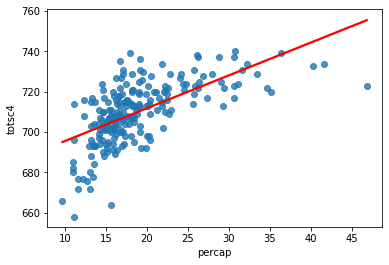

In [5]:
sns.regplot(x='percap', y='totsc4', data = dataMa, ci=False, line_kws = {'color':'red'})

#### Figure 9.1

Text(0, 0.5, 'Test Scores')

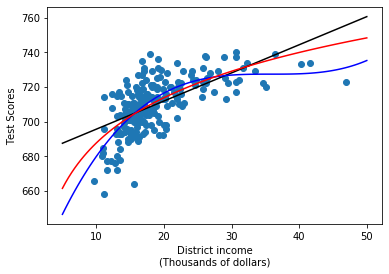

In [9]:
# We use the Massachusetts School data and graph some regression functions
# The colours of the regression functions described below
import numpy as np
from scipy.interpolate import *
from numpy import *
x = np.array(dataMa['percap'])
y = np.array(dataMa['totsc4'])
plt.plot(x,y,'o')
xp = np.linspace(5,50,100)
plt.plot(xp, np.polyval(np.polyfit(x,y,1),xp), 'black')
plt.plot(xp, np.polyval(np.polyfit(x,y,3),xp), 'b')
plt.plot(xp, np.polyval(np.polyfit(np.log(x),y,1),log(xp)), 'r')
plt.xlabel('District income\n(Thousands of dollars)')
plt.ylabel('Test Scores')
# Black is Linear Regression, Red is linear log regression, Blue is Cubic Regression

In [7]:
# We split the data into high and low percentage of English learners and we use the mean for that
dataMa['HiEL'] = dataMa['pctel'] < 1.117676
converter = {False:1, True:0}
# We convert the results into dummy variables i.e. 1s and 0s
dataMa.HiEL = dataMa.HiEL.apply(lambda x: converter[x])
dataMa

,code,municipa,district,regday,specneed,bilingua,occupday,tot_day,s_p_c,spec_ed,lnch_pct,tchratio,percap,totsc4,totsc8,avgsalry,pctel,HiEL
0,1,ABINGTON,Abington,4201,7375.689941,0,0,4646,16.600000,14.600000,11.800000,19.000000,16.379,714,691.0,34.360001,0.000000,0
1,2,ACTON,Acton,4129,8573.990234,0,0,4930,5.700000,17.400000,2.500000,22.600000,25.792,731,NaN,38.063000,1.246106,1
2,3,ACUSHNET,Acushnet,3627,8081.720215,0,0,4281,7.500000,12.100000,14.100000,19.299999,14.040,704,693.0,32.491001,0.000000,0
3,5,AGAWAM,Agawam,4015,8181.370117,0,0,4826,8.600000,21.100000,12.100000,17.900000,16.111,704,691.0,33.105999,0.322581,0
4,7,AMESBURY,Amesbury,4273,7037.220215,0,0,4824,6.100000,16.799999,17.400000,17.500000,15.423,701,699.0,34.436501,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215,344,WINCHESTER,Winchester,5631,9549.150391,0,0,6264,6.800000,11.100000,3.300000,16.900000,30.615,737,730.0,NaN,0.787402,0
216,346,WINTHROP,Winthrop,3986,8068.390137,0,0,4805,12.500000,20.900000,16.600000,16.600000,17.850,704,696.0,NaN,2.512563,1
217,347,WOBURN,Woburn,4945,8069.970215,0,0,5712,17.200001,16.200001,16.900000,18.400000,18.155,721,709.0,NaN,0.000000,0
218,348,WORCESTER,Worcester,4545,9719.620117,6541,2951,5727,8.300000,17.799999,45.700001,16.600000,13.393,693,664.0,35.615501,3.080082,1


#### Table 9.2

In [8]:
# This is basically to do regression charts like in the book. We import couple of libraries to do that.
reg1 = ols("totsc4 ~ tchratio", data=dataMa).fit(cov_type='HC1')
reg2 = ols("totsc4 ~ tchratio + pctel + lnch_pct + np.log(percap)", data=dataMa).fit(cov_type='HC1')
reg3 = ols("totsc4 ~ tchratio + pctel + lnch_pct + percap + np.power(percap,2) + np.power(percap,3)", data=dataMa).fit(cov_type='HC1')
reg4 = ols("totsc4 ~ tchratio + np.power(tchratio,2) + np.power(tchratio,3) + pctel + lnch_pct + percap + np.power(percap,2) + np.power(percap,3)", data=dataMa).fit(cov_type='HC1')
reg5 = ols("totsc4 ~ tchratio + C(HiEL) + HiEL:tchratio + lnch_pct + percap + np.power(percap,2) + np.power(percap,3)", data=dataMa).fit(cov_type='HC1')
reg6 = ols("totsc4 ~ tchratio + lnch_pct + percap + np.power(percap,2) + np.power(percap,3)", data=dataMa).fit(cov_type='HC1')
from stargazer.stargazer import Stargazer
from IPython.core.display import HTML
stargazer = Stargazer([reg1, reg2, reg3, reg4,reg5,reg6])
HTML(stargazer.render_html())


# Now let's go to the Practice questions

In [6]:
#1 thorugh 5 - skipped
#6
#a
import math
SSR_100 = (100-2) * 15.1**2
SSR_200 = 2 * SSR_100
SER_200 = math.sqrt((1/(200-2))*SSR_200)